In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
F = np.zeros((6,6))

In [3]:
F

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [4]:
F[:,:3] = 255

In [5]:
F

array([[255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.]])

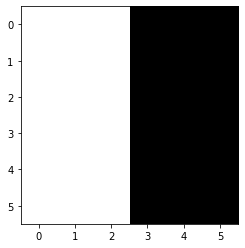

In [6]:
plt.imshow(F,cmap='gray')

In [7]:
# padded F
paddedF = np.zeros((F.shape[0]+2,F.shape[1]+2))

In [10]:
paddedF[1:7,1:7] = F 
paddedF[:,0:4] = 255

In [11]:
paddedF

array([[255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [255., 255., 255., 255.,   0.,   0.,   0.,   0.]])

In [12]:
H1 = np.zeros((3,3))

In [13]:
H1[0,:] = [-1,0,1]
H1[1,:] = [-1,0,1]
H1[2,:] = [-1,0,1]

In [14]:
H1

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

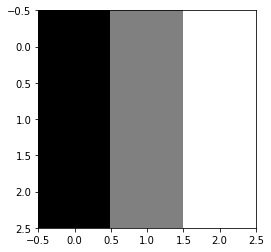

In [15]:
plt.imshow(H1,cmap='gray')

In [16]:
# split the 2D filter into two 1D filters
H1a = H1[:,0]
H1a = H1a.reshape((H1a.shape[0],1))
H1b = np.array([1,0,-1])

In [17]:
H1a

array([[-1.],
       [-1.],
       [-1.]])

In [18]:
H1b

array([ 1,  0, -1])

In [19]:
H1

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

In [20]:
F

array([[255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.]])

In [21]:
H = H1

In [22]:
H

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

In [23]:
def convolve2D(F, H):
    G = np.zeros((F.shape[0]-2,F.shape[1]-2))
    
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            G[i,j] = np.sum(np.multiply(F[i:i+3,j:j+3],H))
    return G
            

In [24]:
G = convolve2D(F,H)
print(G)

[[   0. -765. -765.    0.]
 [   0. -765. -765.    0.]
 [   0. -765. -765.    0.]
 [   0. -765. -765.    0.]]


In [25]:
# G[G>255] = 255

In [26]:
# G[G<0] = 0

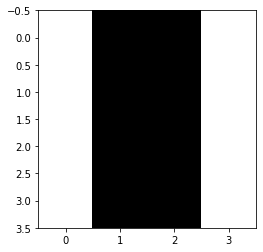

In [27]:
plt.imshow(G,cmap='gray')

In [28]:
H2 = np.zeros((3,3))

In [29]:
H2[0,:] = [1,1,1]
H2[1,:] = [0,0,0]
H2[2,:] = [-1,-1,-1]
H2

array([[ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1., -1., -1.]])

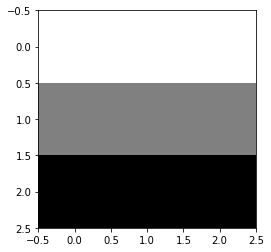

In [30]:
plt.imshow(H2,cmap='gray')

In [31]:
F

array([[255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.],
       [255., 255., 255.,   0.,   0.,   0.]])

<ipython-input-23-4b33eb77012a>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  G[i,j] = np.sum(np.multiply(F[i:i+3,j:j+3],H))


[[ 6.80026401e+07  9.56507269e+06  2.67231188e+06 ...  3.38783004e+06
   4.17859788e+06  1.02064188e+07]
 [ 3.89714319e+06  6.25749217e+06  5.74899198e+06 ... -3.28255306e+05
  -1.75405336e+06 -3.93289846e+06]
 [-5.76160884e+06 -2.44483426e+06  4.58425630e+05 ... -1.08863983e+05
   1.82135700e+04 -7.74803641e+05]
 ...
 [-1.05856726e+06 -2.36345756e+05  3.84608843e+05 ... -3.00102756e+06
  -9.78231151e+05  2.45991239e+05]
 [ 1.90527435e+06  7.74803641e+05 -1.82135700e+04 ... -2.94982434e+06
  -4.58425630e+05  2.44483426e+06]
 [ 4.10682341e+06  3.93289846e+06  1.75405336e+06 ... -2.31207720e+06
  -5.74899198e+06 -6.25749217e+06]]


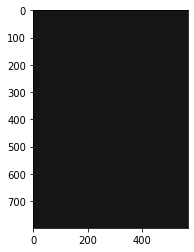

In [207]:
G = convolve2D(F,H2)
print(G)
plt.imshow(G,cmap='gray')

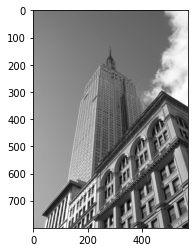

In [208]:
img = np.array(Image.open('empire.jpg').convert('L'))
plt.imshow(img,cmap='gray')

In [185]:
HH = np.zeros((3,3))
HH[0,:] = [-1,0,1]
HH[1,:] = [-2,0,2]
HH[2,:] = [-1,0,1]

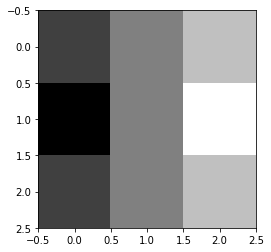

In [186]:
plt.imshow(HH,cmap='gray')
plt.show()

In [187]:
print(img.shape)
imgP = np.zeros((img.shape[0]+2,img.shape[1]+2))
print(imgP.shape)
imgP[1:img.shape[0]+1,1:img.shape[1]+1] = img
HE = convolve2D(img,HH)

(800, 569)
(802, 571)


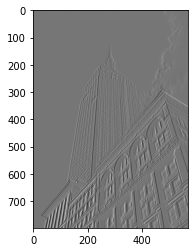

In [188]:
plt.imshow(HE,cmap='gray')
plt.show()

In [189]:
HV = np.zeros((3,3))
HV[0,:] = [1,2,1]
HV[1,:] = [0,0,0]
HV[2,:] = [-1,-2,-1]

In [190]:
GV = convolve2D(img,HV)

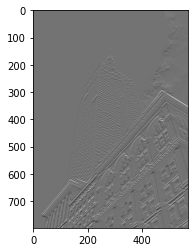

In [191]:
plt.imshow(GV,cmap='gray')
plt.show()

In [192]:
img.shape

(800, 569)

In [193]:
HH

array([[-1.,  0.,  1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]])

In [194]:
HV

array([[ 1.,  2.,  1.],
       [ 0.,  0.,  0.],
       [-1., -2., -1.]])

In [195]:
paddedHH = np.zeros((img.shape[0],img.shape[1]))
paddedHH[0:3,0:3] = HH

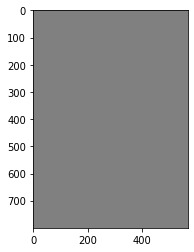

In [196]:
plt.imshow(paddedHH,cmap='gray')

In [197]:
plt.show()

In [198]:
img1 = np.float32(Image.open('empire.jpg').convert('L'))
F = np.fft.fft2(img)
f_shifted = np.fft.fftshift(F)

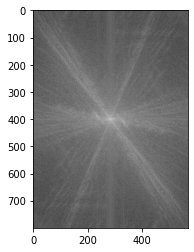

In [199]:
mag_spec = 20*np.log(np.abs(f_shifted))
plt.imshow(mag_spec, cmap='gray')
plt.show()

In [200]:
H = np.fft.fft2(paddedHH)

In [201]:
G = np.multiply(F,H)

In [202]:
G_shifted = np.fft.fftshift(G)

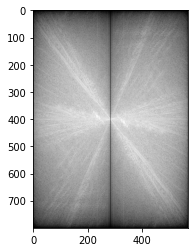

In [203]:
mag_spec = np.log(np.abs(G_shifted)+1)
plt.imshow(mag_spec, cmap='gray')
plt.show()

In [204]:
invF = np.fft.ifft2(G)

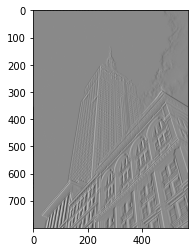

In [205]:
plt.imshow(np.real(invF),cmap='gray')